# Fed Challenge Data Visualization Code

This notebook will develop code for different data visualizations using the FRED API (in python). Before we start, lets set the goals of this project. Most of the visualizations are set to be line graphs, bar graphs and pie charts. Thus, we will develop fundamental code for each of these types, and we will manipulate them in terms of the specific data we are trying to add.


In [8]:
#you might need to install some stuff
#!pip install fredapi
#!pip install seaborn

In [11]:
#then you load the installed packages into the notebook
from fredapi import Fred
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [13]:
#now we set the key to our enviroment 

fred = Fred("0f4d8cbe017c0f3d958eb901e613a8ad")

Now, lets apply a different example: lets work with employment data

In [22]:
#lets do the Unemployment Level/Job Openings: Total Nonfarm

unemployment = fred.get_series('LNU03000000')
unemployment.name = 'unemployment'

openings = fred.get_series('JTUJOL')
openings.name = 'openings'

unemployment_plot = unemployment.to_frame()
unemployment_plot['year'] = unemployment.index
unemployment_plot.reset_index(drop=True, inplace=True)
unemployment_plot.dropna(inplace=True)
unemployment_plot['type'] = 'Unemployment level'

openings_plot = openings.to_frame()
openings_plot['year'] = openings.index
openings_plot.reset_index(drop=True, inplace=True)
openings_plot.dropna(inplace=True)
openings_plot['type'] = 'Job openings'


all_dfs = [unemployment_plot, openings_plot]

# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Thousands', 'Year', 'type1']

merg = pd.concat(all_dfs).reset_index(drop=True)
merg.sort_values(by=['type1'], inplace = True)
merg

,Thousands,Year,type1
1155,12086.0,2022-07-01,Job openings
989,3242.0,2008-09-01,Job openings
988,3808.0,2008-08-01,Job openings
987,4013.0,2008-07-01,Job openings
986,3757.0,2008-06-01,Job openings
...,...,...,...
382,5964.0,1979-11-01,Unemployment level
381,5964.0,1979-10-01,Unemployment level
380,5978.0,1979-09-01,Unemployment level
288,5481.0,1972-01-01,Unemployment level


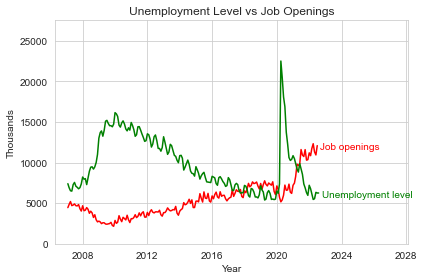

In [23]:
fig, ax = plt.subplots()

#set the lines together with the title
sns.lineplot(ax=ax, data=merg[merg["Year"] > '2007-01-01'], x="Year", y="Thousands", hue = "type1", palette=['r', 'g'], legend=None).set(title='Unemployment Level vs Job Openings')

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, set(merg["type1"])):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
plt.ylim([0, 27500])
sns.set_style("whitegrid")
plt.show()

In [24]:
#now, to cut it short, we can create a ratio by dividing themset(merg["type1"])
#first, match by year

data = unemployment_plot.merge(openings_plot, how='left', on='Year')
data.dropna(inplace=True)

data["div"] = data["Thousands_x"]/ data["Thousands_y"]
data

,Thousands_x,Year,type1_x,Thousands_y,type1_y,div
635,5264.0,2000-12-01,Unemployment level,4335.0,Job openings,1.214302
636,6647.0,2001-01-01,Unemployment level,5592.0,Job openings,1.188662
637,6523.0,2001-02-01,Unemployment level,4844.0,Job openings,1.346614
638,6509.0,2001-03-01,Unemployment level,4514.0,Job openings,1.441958
639,6004.0,2001-04-01,Unemployment level,5095.0,Job openings,1.178410
...,...,...,...,...,...,...
890,6168.0,2022-03-01,Unemployment level,11737.0,Job openings,0.525518
891,5458.0,2022-04-01,Unemployment level,12324.0,Job openings,0.442876
892,5548.0,2022-05-01,Unemployment level,11319.0,Job openings,0.490149
893,6334.0,2022-06-01,Unemployment level,10941.0,Job openings,0.578923


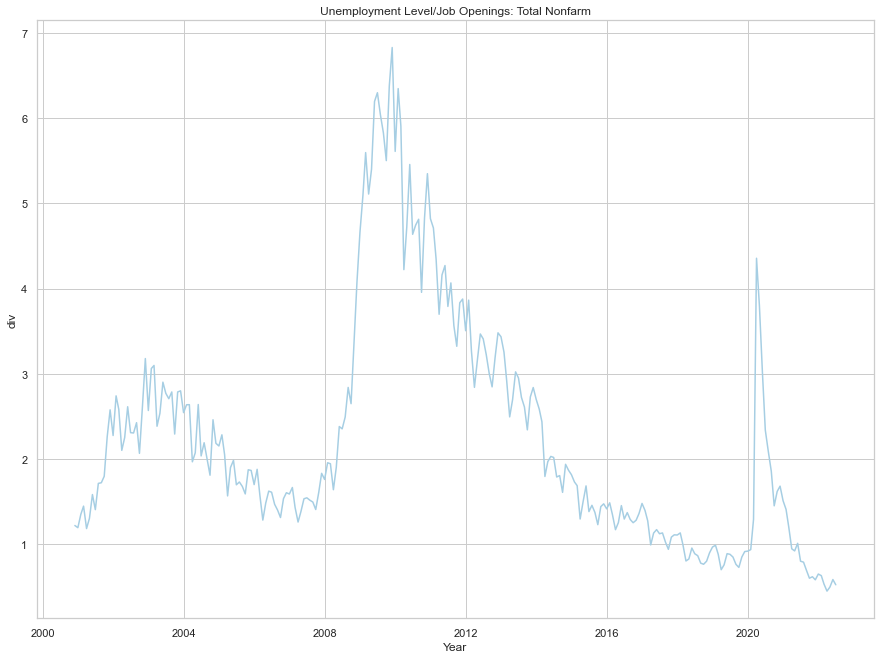

In [30]:
sns.set_palette("Paired")

sns.lineplot(data=data, x="Year", y="div").set(title='Unemployment Level/Job Openings: Total Nonfarm')
sns.set(rc={'figure.figsize':(10,11)})
sns.set_style("whitegrid")


Let's look at housing data, starting upstream with privately-owned housing permits

In [35]:
permits = fred.get_series('PERMIT')
permits.name = 'permits'
# in thousands, SAAR
starts = fred.get_series('HOUST')
starts.name = 'starts'
# in thousands, SAAR
completes = fred.get_series('COMPUTSA')
completes.name = 'completes'
# in thousands, SAAR


permits_plot = permits.to_frame()
permits_plot['year'] = permits.index
permits_plot.reset_index(drop=True, inplace=True)
permits_plot.dropna(inplace=True)
permits_plot['type'] = 'New Housing Permits'

starts_plot = starts.to_frame()
starts_plot['year'] = starts.index
starts_plot.reset_index(drop=True, inplace=True)
starts_plot.dropna(inplace=True)
starts_plot['type'] = 'Housing Starts'

completes_plot = completes.to_frame()
completes_plot['year'] = completes.index
completes_plot.reset_index(drop=True, inplace=True)
completes_plot.dropna(inplace=True)
completes_plot['type'] = 'Housing Completions'

all_dfs = [permits_plot, starts_plot, completes_plot]

# Give all df's common column names: in this case, it is in billions of dollars
i=0
for df in all_dfs:
    print(i)
    df.columns = ['Thousands', 'Year', 'type1']
    i=i+1
    
merge = pd.concat(all_dfs).reset_index(drop=True)
merge.sort_values(by=['type1'], inplace = True)
merge

0
1
2


,Thousands,Year,type1
2168,1424.0,2022-07-01,Housing Completions
1735,1672.0,1986-06-01,Housing Completions
1734,1833.0,1986-05-01,Housing Completions
1733,1685.0,1986-04-01,Housing Completions
1732,1756.0,1986-03-01,Housing Completions
...,...,...,...
497,1626.0,2001-06-01,New Housing Permits
496,1665.0,2001-05-01,New Housing Permits
495,1666.0,2001-04-01,New Housing Permits
504,1665.0,2002-01-01,New Housing Permits


No handles with labels found to put in legend.


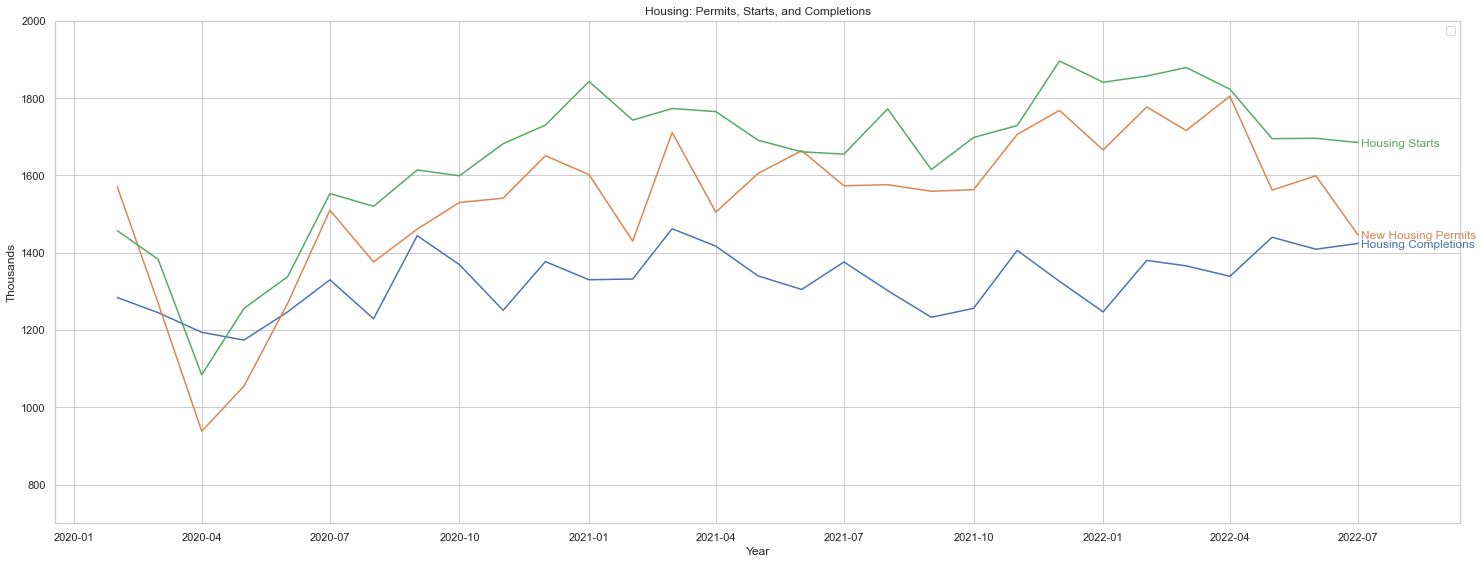

In [58]:
fig, ax = plt.subplots(figsize=(21,8))

#set the lines together with the title
sns.lineplot(ax=ax, data=merge[merge["Year"] > '2020-01-01'], x="Year", y="Thousands", hue = "type1", legend=None).set(title='Housing: Permits, Starts, and Completions')


#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, set(merge["type1"])):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
plt.legend(loc='upper right')
#set the y limits of the graph
plt.ylim([700, 2000])
sns.set_style("whitegrid")
plt.show()

even further upstream: construction spending and its breakdown

In [53]:
#lets do the Unemployment Level/Job Openings: Total Nonfarm

total = fred.get_series('TTLCONS')
total.name = 'total construction spend'

public = fred.get_series('TLPBLCONS')
public.name = 'public construction spend'

residential = fred.get_series('PRRESCONS')
residential.name = 'private residential construction spend'

nonres = fred.get_series('PNRESCONS')
nonres.name = 'private nonresidential construction spend'

total_plot = total.to_frame()
total_plot['year'] = total.index
total_plot.reset_index(drop=True, inplace=True)
total_plot.dropna(inplace=True)
total_plot['type'] = 'Total'

public_plot = public.to_frame()
public_plot['year'] = public.index
public_plot.reset_index(drop=True, inplace=True)
public_plot.dropna(inplace=True)
public_plot['type'] = 'Public'

res_plot = residential.to_frame()
res_plot['year'] = residential.index
res_plot.reset_index(drop=True, inplace=True)
res_plot.dropna(inplace=True)
res_plot['type'] = 'Residential'

nonres_plot = nonres.to_frame()
nonres_plot['year'] = nonres.index
nonres_plot.reset_index(drop=True, inplace=True)
nonres_plot.dropna(inplace=True)
nonres_plot['type'] = 'Nonresidential'

all_dfs = [total_plot, public_plot, res_plot, nonres_plot]


# Give all df's common column names: in this case, it is in billions of dollars
for df in all_dfs:
    df.columns = ['Millions of $', 'Year', 'type1']

merge2 = pd.concat(all_dfs).reset_index(drop=True)
merge2.sort_values(by=['type1'], inplace = True)
merge2

,Millions of $,Year,type1
1419,503879.0,2022-07-01,Nonresidential
1176,250341.0,2002-04-01,Nonresidential
1177,241636.0,2002-05-01,Nonresidential
1178,235344.0,2002-06-01,Nonresidential
1179,229426.0,2002-07-01,Nonresidential
...,...,...,...
240,862722.0,2013-01-01,Total
241,873583.0,2013-02-01,Total
242,864510.0,2013-03-01,Total
222,792381.0,2011-07-01,Total


In [62]:
total.max()

1793778.0

In [61]:
public.max()

377334.0

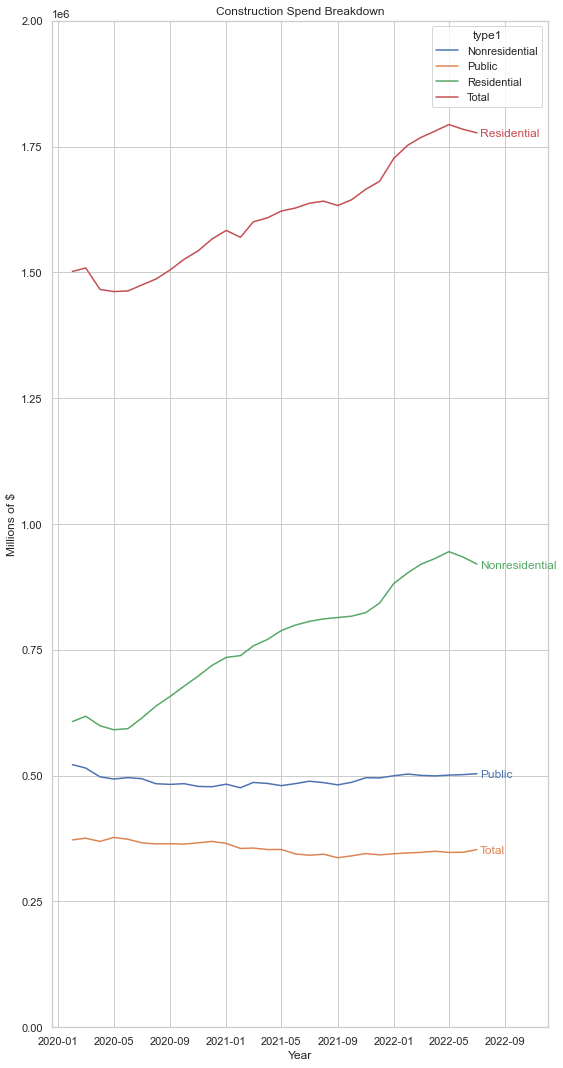

In [64]:
fig, ax = plt.subplots()

#set the lines together with the title
sns.lineplot(ax=ax, data=merge2[merge2["Year"] > '2020-01-01'], x="Year", y="Millions of $", hue = "type1", legend='auto').set(title='Construction Spend Breakdown')

#create the labels at the end of each line
#note that the set(merg['type1']) is essential for the correct results

for line, type1 in zip(ax.lines, set(merge2["type1"])):
    y = line.get_ydata()[-1]
    x = line.get_xdata()[-1]
    if not np.isfinite(y):
        y=next(reversed(line.get_ydata()[~line.get_ydata().mask]),float("nan"))
    if not np.isfinite(y) or not np.isfinite(x):
        continue     
    text = ax.annotate(type1,
               xy=(x, y),
               xytext=(3, -4),
               color=line.get_color(),
               xycoords=(ax.get_xaxis_transform(),
                 ax.get_yaxis_transform()),
               textcoords="offset points")
    text_width = (text.get_window_extent(
    fig.canvas.get_renderer()).transformed(ax.transData.inverted()).width)
    if np.isfinite(text_width):
        ax.set_xlim(ax.get_xlim()[0], text.xy[0] + text_width * 1.05)

plt.tight_layout()
#set the y limits of the graph
plt.ylim([0, 2000000])
sns.set_style("whitegrid")
plt.show()